In [24]:
import numpy as np
from scipy.optimize import differential_evolution
import pandas as pd
import matplotlib.pyplot as plt 

### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.   

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

### 1. Параметр strategy:

In [117]:
strategy_data = {'number' : range(1,13),
                 'strategy': ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp',
                     'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin',
                     'rand2bin', 'rand1bin']}
strategy_data = pd.DataFrame(strategy_data)

In [118]:
%%time
strategy_success = []
strategy_nit = []
strategy_error = []
for row in strategy_data.strategy:
    strategy = row
    result = differential_evolution(ackley, bounds, seed=42, strategy = strategy)
    strategy_success.append(result.success)
    strategy_nit.append(result.nit)
    strategy_error.append((result.x[0])**2 + (result.x[1])**2)

Wall time: 11.6 s


In [119]:
strategy_success = pd.DataFrame(strategy_success, columns = ['strategy_success'])
strategy_nit = pd.DataFrame(strategy_nit, columns = ['strategy_nit'])
strategy_error = pd.DataFrame(strategy_error, columns = ['strategy_error'])
# Объединение данных в один dataframe
strategy_data = strategy_data.join(strategy_success)
strategy_data = strategy_data.join(strategy_nit)
strategy_data = strategy_data.join(strategy_error)

In [120]:
strategy_data

,number,strategy,strategy_success,strategy_nit,strategy_error
0,1,best1bin,True,90,0.0
1,2,best1exp,True,140,0.0
2,3,rand1exp,True,241,0.0
3,4,randtobest1exp,True,160,0.0
4,5,currenttobest1exp,False,1000,0.0
5,6,best2exp,True,244,0.0
6,7,rand2exp,True,363,0.0
7,8,randtobest1bin,True,101,0.0
8,9,currenttobest1bin,False,1000,0.0
9,10,best2bin,True,166,0.0


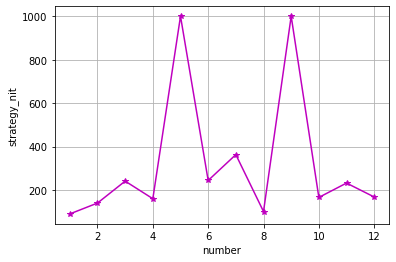

In [33]:
plt.plot(strategy_data.number, strategy_data.strategy_nit, 'm-*')
plt.xlabel('number')
plt.ylabel('strategy_nit')
plt.grid()

Всего доступно 12 стратегий. Наименьшее количество итераций (90) достигается при strategy = 'best1bin'. При этом для 2-х стратегий 'currenttobest1exp' и 'currenttobest1bin' алгоритм не находит минимум функции.

### 2. Параметр popsize:

In [121]:
popsize_data = {'popsize' : range(1, 21)}
popsize_data = pd.DataFrame(popsize_data)

In [122]:
%%time
popsize_success = []
popsize_nit = []
popsize_error = []
for row in popsize_data.popsize:
    popsize = row
    result = differential_evolution(ackley, bounds, seed=42, popsize = popsize)
    popsize_success.append(result.success)
    popsize_nit.append(result.nit)
    popsize_error.append((result.x[0])**2 + (result.x[1])**2)

Wall time: 3.25 s


In [123]:
popsize_success = pd.DataFrame(popsize_success, columns = ['popsize_success'])
popsize_nit = pd.DataFrame(popsize_nit, columns = ['popsize_nit'])
popsize_error = pd.DataFrame(popsize_error, columns = ['popsize_error'])
# Объединение данных в один dataframe
popsize_data = popsize_data.join(popsize_success)
popsize_data = popsize_data.join(popsize_nit)
popsize_data = popsize_data.join(popsize_error)

In [124]:
popsize_data.head(10)

,popsize,popsize_success,popsize_nit,popsize_error
0,1,True,7,9.066211e-01
1,2,True,7,9.066211e-01
2,3,True,29,4.990211e-08
3,4,True,39,2.496773e-11
4,5,True,100,0.000000e+00
5,6,True,99,0.000000e+00
6,7,True,87,0.000000e+00
7,8,True,97,0.000000e+00
8,9,True,101,0.000000e+00
9,10,True,97,0.000000e+00


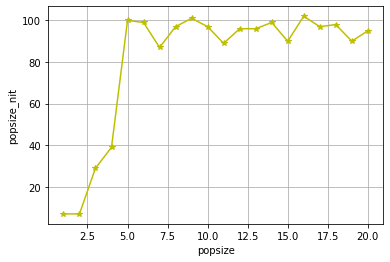

In [126]:
plt.plot(popsize_data.popsize, popsize_data.popsize_nit, 'y-*')
plt.xlabel('popsize')
plt.ylabel('popsize_nit')
plt.grid()

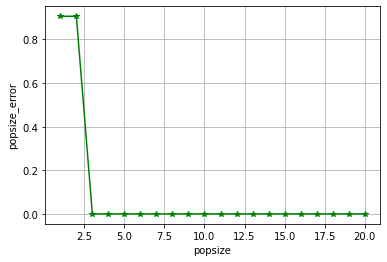

In [127]:
plt.plot(popsize_data.popsize, popsize_data.popsize_error, 'g-*')
plt.xlabel('popsize')
plt.ylabel('popsize_error')
plt.grid()

popsize - множитель для установки размера популяции, целое число. Для значения множителя 1 и 2 достигается минимальное значение количества итераций, а затем происходит их рост, и начиная с 5 происходят колебания количества итераций в диапазоне от 80 до 100.
Следует отметить, что значения параметра 1 и 2 велико значение ошибки. Следовательно, целесообразно брать popsize = 3.

### 3. Параметр tol:

In [128]:
tol_data = {'number' : range(1, 9),
            'tol': [10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1)]}
tol_data = pd.DataFrame(tol_data)

In [129]:
%%time
tol_success = []
tol_nit = []
tol_error = []
for row in tol_data.tol:
    tol = row
    result = differential_evolution(ackley, bounds, seed=42, tol = tol)
    tol_success.append(result.success)
    tol_nit.append(result.nit)
    tol_error.append((result.x[0])**2 + (result.x[1])**2)

Wall time: 1.35 s


In [130]:
tol_success = pd.DataFrame(tol_success, columns = ['tol_success'])
tol_nit = pd.DataFrame(tol_nit, columns = ['tol_nit'])
tol_error = pd.DataFrame(tol_error, columns = ['tol_error'])
# Объединение данных в один dataframe
tol_data = tol_data.join(tol_success)
tol_data = tol_data.join(tol_nit)
tol_data = tol_data.join(tol_error)

In [131]:
tol_data

,number,tol,tol_success,tol_nit,tol_error
0,1,0.000001,True,90,0.000000
1,2,0.000010,True,90,0.000000
2,3,0.000100,True,90,0.000000
3,4,0.001000,True,90,0.000000
4,5,0.010000,True,90,0.000000
5,6,0.100000,True,90,0.000000
6,7,1.000000,True,1,0.906621
7,8,10.000000,True,1,0.906621


In [90]:
differential_evolution(ackley, bounds, seed=42, tol = 10**-1)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [91]:
differential_evolution(ackley, bounds, seed=42, tol = 10**0)

     fun: 2.579927557029887
     jac: array([ 1.77635684e-06, -3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 1
 success: True
       x: array([2.04802499e-08, 9.52166534e-01])

In [92]:
differential_evolution(ackley, bounds, seed=42, tol = 10**1)

     fun: 2.579927557029887
     jac: array([ 1.77635684e-06, -3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 1
 success: True
       x: array([2.04802499e-08, 9.52166534e-01])

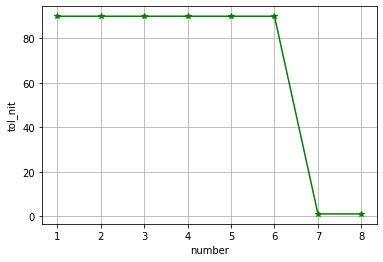

In [93]:
plt.plot(tol_data.number, tol_data.tol_nit, 'g-*')
plt.xlabel('number')
plt.ylabel('tol_nit')
plt.grid()

При значении параметра 1 и 10 качество поиска минимума ниже, а при других значениях погрешности число итераций не изменяется, поэтому имеет смысл брать меньшее значение погрешности, например, $10^{-6}$

### 4. Параметр mutation:

In [132]:
mutation_data = {'mutation' : range(0, 20, 1)}
mutation_data = pd.DataFrame(mutation_data)
mutation_data.mutation = mutation_data.mutation/10

In [133]:
%%time
mutation_success = []
mutation_nit = []
mutation_error = []
for row in mutation_data.mutation:
    mutation = row
    result = differential_evolution(ackley, bounds, seed=42, mutation = mutation)
    mutation_success.append(result.success)
    mutation_nit.append(result.nit)
    mutation_error.append((result.x[0])**2 + (result.x[1])**2)

Wall time: 6.88 s


In [134]:
mutation_success = pd.DataFrame(mutation_success, columns = ['mutation_success'])
mutation_nit = pd.DataFrame(mutation_nit, columns = ['mutation_nit'])
mutation_error = pd.DataFrame(mutation_error, columns = ['mutation_error'])
# Объединение данных в один dataframe
mutation_data = mutation_data.join(mutation_success)
mutation_data = mutation_data.join(mutation_nit)
mutation_data = mutation_data.join(mutation_error)

In [136]:
mutation_data.head(10)

,mutation,mutation_success,mutation_nit,mutation_error
0,0.0,True,3,1.875898
1,0.1,True,5,1.875898
2,0.2,True,28,0.000000
3,0.3,True,38,0.000000
4,0.4,True,47,0.000000
5,0.5,True,57,0.000000
6,0.6,True,76,0.000000
7,0.7,True,91,0.000000
8,0.8,True,104,0.000000
9,0.9,True,137,0.000000


In [113]:
differential_evolution(ackley, bounds, seed=42, mutation = 0.)

     fun: 1.283417816466681e-13
 message: 'Optimization terminated successfully.'
    nfev: 4233
     nit: 138
 success: True
       x: array([4.4408921e-14, 8.8817842e-15])

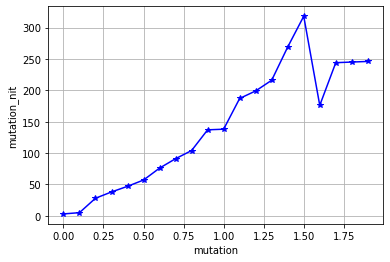

In [110]:
plt.plot(mutation_data.mutation, mutation_data.mutation_nit, 'b-*')
plt.xlabel('mutation')
plt.ylabel('mutation_nit')
plt.grid()

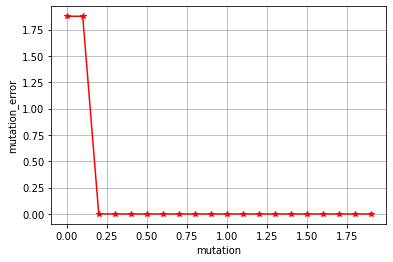

In [137]:
plt.plot(mutation_data.mutation, mutation_data.mutation_error, 'r-*')
plt.xlabel('mutation')
plt.ylabel('mutation_error')
plt.grid()

Целесообразно выбрать такое значение, при котором, во-первых, ошибка равна 0, во-вторых, количество итераций минимальное. Такая ситуация достигается при mutation = 3.

### 5. Параметр recombination:

In [138]:
recombination_data = {'recombination' : range(0, 11, 1)}
recombination_data = pd.DataFrame(recombination_data)
recombination_data.recombination = recombination_data.recombination / 10

In [139]:
%%time
recombination_success = []
recombination_nit = []
recombination_error = []
for row in recombination_data.recombination:
    recombination = row
    result = differential_evolution(ackley, bounds, seed=42, recombination = recombination)
    recombination_success.append(result.success)
    recombination_nit.append(result.nit)
    recombination_error.append((result.x[0])**2 + (result.x[1])**2)

Wall time: 2.72 s


In [140]:
recombination_success = pd.DataFrame(recombination_success, columns = ['recombination_success'])
recombination_nit = pd.DataFrame(recombination_nit, columns = ['recombination_nit'])
recombination_error = pd.DataFrame(recombination_error, columns = ['recombination_error'])
# Объединение данных в один dataframe
recombination_data = recombination_data.join(recombination_success)
recombination_data = recombination_data.join(recombination_nit)
recombination_data = recombination_data.join(recombination_error)

In [141]:
recombination_data

,recombination,recombination_success,recombination_nit,recombination_error
0,0.0,True,111,0.0
1,0.1,True,126,0.0
2,0.2,True,110,0.0
3,0.3,True,108,0.0
4,0.4,True,108,0.0
5,0.5,True,107,0.0
6,0.6,True,96,0.0
7,0.7,True,90,0.0
8,0.8,True,84,0.0
9,0.9,True,85,0.0


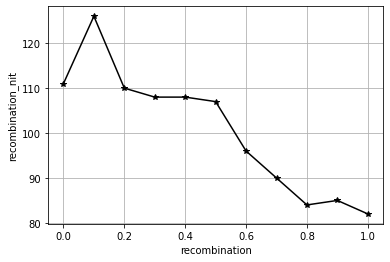

In [143]:
plt.plot(recombination_data.recombination, recombination_data.recombination_nit, 'k-*')
plt.xlabel('recombination')
plt.ylabel('recombination_nit')
plt.grid()

С увеличением количества рекомбинаций, количество итераций снижается. Так как ошибка при всех случаях равна 0, то целесообразно выбрать recombination = 1.

### 6. Параметр updating:

In [147]:
updating_data = {'number' : range(1,3),
                 'updating': ['immediate', 'deferred']}
updating_data = pd.DataFrame(updating_data)

In [148]:
%%time
updating_success = []
updating_nit = []
updating_error = []
for row in updating_data.updating:
    updating = row
    result = differential_evolution(ackley, bounds, seed=42, updating = updating)
    updating_success.append(result.success)
    updating_nit.append(result.nit)
    updating_error.append((result.x[0])**2 + (result.x[1])**2)

Wall time: 437 ms


In [149]:
updating_success = pd.DataFrame(updating_success, columns = ['updating_success'])
updating_nit = pd.DataFrame(updating_nit, columns = ['updating_nit'])
updating_error = pd.DataFrame(updating_error, columns = ['updating_error'])
# Объединение данных в один dataframe
updating_data = updating_data.join(updating_success)
updating_data = updating_data.join(updating_nit)
updating_data = updating_data.join(updating_error)

In [150]:
updating_data

,number,updating,updating_success,updating_nit,updating_error
0,1,immediate,True,90,0.0
1,2,deferred,True,122,0.0


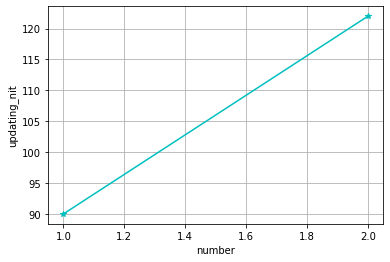

In [152]:
plt.plot(updating_data.number, updating_data.updating_nit, 'c-*')
plt.xlabel('number')
plt.ylabel('updating_nit')
plt.grid()

Оптимальное значение достигается при updating = immediate.

### Допзадание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

Не будем рассматривать те стратегии, которые на тестовом примере не показали сходимость:

In [174]:
strategy_data = {'strategy': ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp',
                              'best2exp', 'rand2exp', 'randtobest1bin', 'best2bin',
                              'rand2bin', 'rand1bin']}
strategy_data = pd.DataFrame(strategy_data)

Будем рассматривать только то, значение параметров, для которых наблюдалось наименьшее количество итераций, и два ближайших к нему.

In [175]:
popsize_data = {'popsize' : range(3, 6)}
popsize_data = pd.DataFrame(popsize_data)

In [176]:
tol_data = {'tol': [10**(-6), 10**(-5), 10**(-4)]}
tol_data = pd.DataFrame(tol_data)

In [177]:
mutation_data = {'mutation' : range(2, 5, 1)}
mutation_data = pd.DataFrame(mutation_data)
mutation_data.mutation = mutation_data.mutation/10

In [178]:
recombination_data = {'recombination' : range(8, 11, 1)}
recombination_data = pd.DataFrame(recombination_data)
recombination_data.recombination = recombination_data.recombination / 10

In [179]:
updating_data = {'updating': ['immediate', 'deferred']}
updating_data = pd.DataFrame(updating_data)

In [180]:
strategy_data['key'] = 0
popsize_data['key'] = 0
tol_data['key'] = 0
mutation_data['key'] = 0
recombination_data['key'] = 0
updating_data['key'] = 0

Декартово произведение:

In [181]:
df_cartesian = strategy_data.merge(popsize_data, how = 'outer')
df_cartesian = df_cartesian.merge(tol_data, how = 'outer')
df_cartesian = df_cartesian.merge(mutation_data, how = 'outer')
df_cartesian = df_cartesian.merge(recombination_data, how = 'outer')
df_cartesian = df_cartesian.merge(updating_data, how = 'outer')

In [183]:
df_cartesian.drop('key', axis = 1, inplace = True)

In [186]:
df_cartesian.head(10)

,strategy,popsize,tol,mutation,recombination,updating
0,best1bin,3,0.000001,0.2,0.8,immediate
1,best1bin,3,0.000001,0.2,0.8,deferred
2,best1bin,3,0.000001,0.2,0.9,immediate
3,best1bin,3,0.000001,0.2,0.9,deferred
4,best1bin,3,0.000001,0.2,1.0,immediate
5,best1bin,3,0.000001,0.2,1.0,deferred
6,best1bin,3,0.000001,0.3,0.8,immediate
7,best1bin,3,0.000001,0.3,0.8,deferred
8,best1bin,3,0.000001,0.3,0.9,immediate
9,best1bin,3,0.000001,0.3,0.9,deferred


Будем выполнять поиск по сетке:

In [195]:
%%time
df_success = []
df_nit = []
df_error = []
for index, row in df_cartesian.iterrows():
    
    strategy = row['strategy']
    popsize = row['popsize']
    tol = row['tol']
    mutation = row['mutation']
    recombination = row['recombination']
    updating = row['updating']
    
    result = differential_evolution(ackley, bounds, seed=42, 
                                    strategy = strategy,
                                    popsize = popsize,
                                    tol = tol,
                                    mutation = mutation,
                                    recombination = recombination,
                                    updating = updating)
    
    df_success.append(result.success)
    df_nit.append(result.nit)
    df_error.append((result.x[0])**2 + (result.x[1])**2)

Wall time: 59.3 s


In [196]:
df_success = pd.DataFrame(df_success, columns = ['success'])
df_nit = pd.DataFrame(df_nit, columns = ['nit'])
df_error = pd.DataFrame(df_error, columns = ['error'])
# Объединение данных в один dataframe
df_cartesian = df_cartesian.join(df_success)
df_cartesian = df_cartesian.join(df_nit)
df_cartesian = df_cartesian.join(df_error)

Удалим такие комбинации параметров, для которых значение ошибки велико:

In [199]:
new_df = df_cartesian[df_cartesian.error <= 10**(-6)]

Найдем комбинации с минимальным количеством итераций:

In [202]:
new_df[new_df['nit'] == new_df['nit'].min()]

,strategy,popsize,tol,mutation,recombination,updating,success,nit,error
94,best1bin,4,0.0001,0.2,1.0,immediate,True,5,1.924715e-18
256,best1exp,4,0.0001,0.2,1.0,immediate,True,5,1.924715e-18
